In [4]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torchvision import datasets, transforms
from net import NormalNetwork, PCANetwork, train_network, test_network
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Train with MNIST dataset

In [5]:
model = NormalNetwork(unpack_data=True)
model

NormalNetwork(
  (forward_prob): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
  (loss_func): CrossEntropyLoss()
)

In [6]:
train_network(model)

Training epoch 20: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:01<00:00, 1456.57it/s]


#### Test with MNIST dataset

In [7]:
res = test_network(model)
print(res)

Testing network: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 2076.22it/s]

{'accuracy': 0.9782, 'loss': 0.06984925080174585, 'confusion matrix': array([[ 968,    0,    0,    2,    1,    4,    1,    1,    1,    2],
       [   0, 1127,    1,    2,    0,    1,    1,    1,    2,    0],
       [   4,    1, 1017,    2,    1,    0,    1,    2,    4,    0],
       [   0,    0,    7,  985,    0,    5,    0,    3,    4,    6],
       [   0,    0,    4,    0,  966,    0,    3,    1,    0,    8],
       [   2,    1,    0,    7,    1,  876,    2,    0,    1,    2],
       [   5,    3,    2,    1,    4,   12,  930,    0,    1,    0],
       [   2,    5,   10,    2,    4,    0,    0,  990,    3,   12],
       [   4,    0,    2,   11,    5,    5,    2,    3,  936,    6],
       [   1,    2,    0,    5,    9,    3,    1,    1,    0,  987]])}


#### Plot confusion matrix

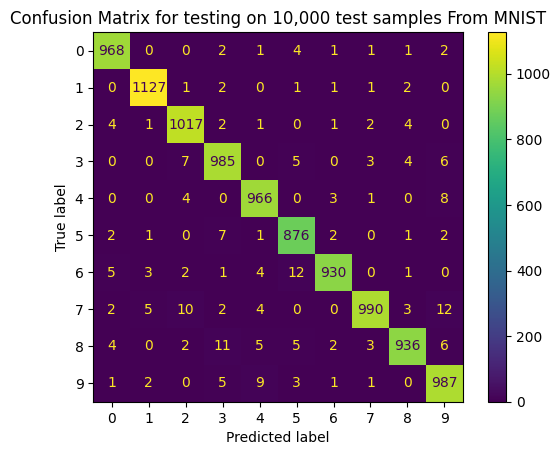

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix= res["confusion matrix"])
disp.plot()
plt.title("Confusion Matrix for testing on 10,000 test samples From MNIST")
plt.show()

#### Train with PCA data

In [12]:
model = PCANetwork(0.95, unpack_data=True)
model

PCANetwork(
  (forward_prob): Sequential(
    (0): Linear(in_features=331, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
  (loss_func): CrossEntropyLoss()
)

In [13]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

60298

In [14]:
train_network(model)

Training epoch 20: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:01<00:00, 1787.42it/s]


In [15]:
res = test_network(model)
print(res)

Testing network: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 2351.00it/s]

{'accuracy': 0.9719, 'loss': 0.09965999405860854, 'confusion matrix': array([[ 968,    0,    1,    2,    1,    4,    1,    1,    2,    0],
       [   0, 1126,    4,    0,    0,    1,    1,    0,    3,    0],
       [   5,    4, 1001,    4,    2,    1,    3,    6,    6,    0],
       [   0,    0,    4,  986,    0,    4,    0,    8,    4,    4],
       [   3,    0,    8,    0,  947,    1,    4,    4,    2,   13],
       [   3,    0,    0,   12,    1,  864,    3,    0,    4,    5],
       [   7,    3,    4,    1,    5,    8,  927,    0,    3,    0],
       [   1,    6,   12,    3,    0,    0,    0,  993,    1,   12],
       [   2,    1,    3,    7,    4,   11,    2,    6,  934,    4],
       [   3,    4,    0,    9,    6,    4,    1,    7,    2,  973]])}


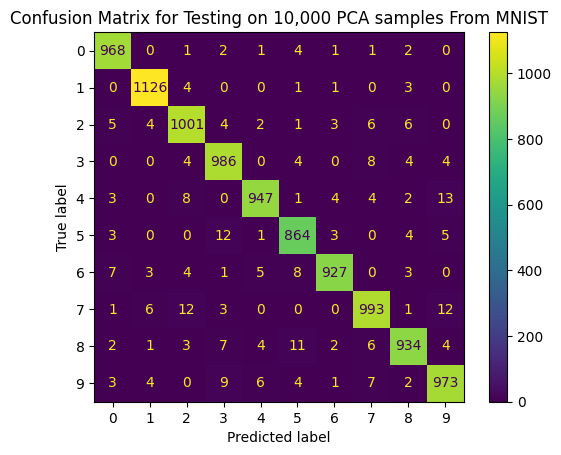

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=res["confusion matrix"])
disp.plot()
plt.title("Confusion Matrix for Testing on 10,000 PCA samples From MNIST")
plt.show()

In [17]:
from graph import draw_metric_graph, draw_time_graph

Initializing networks...


Testing network: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 1963.67it/s]


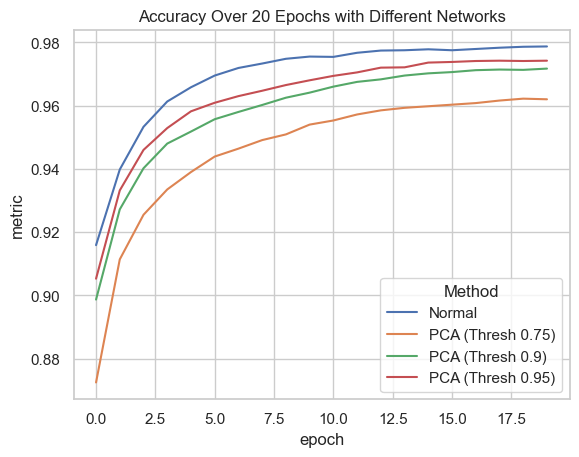

In [18]:
draw_metric_graph(pca_thresh=[0.75, 0.90, 0.95], epochs=20)

In [ ]:
draw_time_graph(pca_thresh=[0.95, 0.90, 0.75], epochs=10)

Training epoch 7:  18%|███████████████████▌                                                                                          | 333/1875 [00:00<00:00, 1660.38it/s]